# Sleep Health and Lifestyle
<img src="./images/ryujin.jpg" alt="Drawing" style="width: 200px;"/>

----------

# About this Dataset
This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons. with the following columns:
- Person ID
- Gender
- Age
- Occupation
- Sleep Duration
- Quality of Sleep
- Physical Activity
- Stress Level
- BMI Category
- Blood Pressure
- Heart Rate
- Daily Steps
- Sleep Disorder
----------

## What are we exploring today?
- Which **factors** could contribute to a **sleep disorder**?
- Does an **increased physical activity level** result in a better **quality of sleep**?
- Does the presence of a **sleep disorder** affect the subjective **sleep quality** metric?
- Difference of **sleep quality** for each **occupation**
- Link between **age** and **sleep duration** 
----------

## Objective:
- Construct a classifier to predict the **presence of a sleep disorder** based on the other columns in the dataset.
-----------

##### Tasks
<s>1. Loading and first look at the data
 - Importing relevant libraries
 - Downloading dataset
 - Checking overall info
 - Looking for missing and wrong values</s>

2. Analysis and vizualization
- <s>Which factors could contribute to a sleep disorder?</s>  
- <s>Does an increased physical activity level result in a better quality of sleep?</s>
- <s>Does the presence of a sleep disorder affect the subjective sleep quality metric?</s>
- <s>Whats the difference of sleep quality for each occupation?</s>
- <s>Whats the link between age and sleep duration?</s>

3. Processing and preparation data for modeling
 - <s> Encoding for categorical values</s>
 - Normalization values
 - Balancing classes if they are not

4. Classification creation to predict sleep disorder
 - Test/Train split
 - Using different algorithms
 - Model scoring

5. Optimization and choosing hyperparameters
 - Using GridSearchCV or RandomizedSearchCV
 - Model productive scoring

6. Conclusion
 - Making confusion matrix
 - Looking for feature importance
 - Conclusion: which factors affect sleep disorders

## Loading and first look at the data

In [2]:
# For working with data
import pandas as pd
import numpy as np

# For vizualization 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
# filling missing values
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [8]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

## Data Preparation for Analysis

First we need to encode categorical variables
- [Gender] Female: 0, Male: 1
- [Occupation] Nurse: 0, Doctor: 1, Engineer: 3, Lawyer: 4, Teacher: 5, Accountant: 6, Salesperson: 7, Software Engineer: 8, Scientist: 9, Sales Representative: 10, Manager: 11
- [BMI Category] Normal: 0, Overweight: 1, Obese: 2, Underweight: 3
- [Sleep Disorder] None: 0, Insomnia: 1, Sleep Apnea: 2

In [10]:
df_new = df.copy()

df_new['Gender'] = df['Gender'].map({'Female': 0, 'Male':1})
df_new['Occupation'] = df['Occupation'].map({'Nurse': 0, 'Doctor': 1, 'Engineer': 3, 'Lawyer': 4, 'Teacher': 5, 'Accountant': 6, 'Salesperson': 7, 'Software Engineer': 8, 'Scientist': 9, 'Sales Representative': 10, 'Manager': 11})
df_new['BMI Category'] = df['BMI Category'].map({'Normal': 0, 'Overweight': 1, 'Obese': 2, 'Normal Weight': 3})
df_new['Sleep Disorder'] = df['Sleep Disorder'].map({'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2})
df_new

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,8,6.1,6,42,6,1,126/83,77,4200,0
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,0
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,0
3,4,1,28,10,5.9,4,30,8,2,140/90,85,3000,2
4,5,1,28,10,5.9,4,30,8,2,140/90,85,3000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,0,8.1,9,75,3,1,140/95,68,7000,2
370,371,0,59,0,8.0,9,75,3,1,140/95,68,7000,2
371,372,0,59,0,8.1,9,75,3,1,140/95,68,7000,2
372,373,0,59,0,8.1,9,75,3,1,140/95,68,7000,2


In [11]:
df_new.isna().value_counts()

Person ID  Gender  Age    Occupation  Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level  BMI Category  Blood Pressure  Heart Rate  Daily Steps  Sleep Disorder
False      False   False  False       False           False             False                    False         False         False           False       False        False             374
Name: count, dtype: int64

We didn't forget anything. Great!

In [12]:
df_new[['BP_Systolic','BP_Diastolic']] = df_new['Blood Pressure'].str.split('/',expand=True).astype(int)
df_new = df_new.drop('Blood Pressure',axis=1) 
df_new.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP_Systolic,BP_Diastolic
0,1,1,27,8,6.1,6,42,6,1,77,4200,0,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
3,4,1,28,10,5.9,4,30,8,2,85,3000,2,140,90
4,5,1,28,10,5.9,4,30,8,2,85,3000,2,140,90


Now we can work with this data. Cool!

## Analysis and Vizualization

##### Question 1. Which factor would contribute to a sleep disorder?

In [13]:
df_new.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP_Systolic,BP_Diastolic
0,1,1,27,8,6.1,6,42,6,1,77,4200,0,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
3,4,1,28,10,5.9,4,30,8,2,85,3000,2,140,90
4,5,1,28,10,5.9,4,30,8,2,85,3000,2,140,90


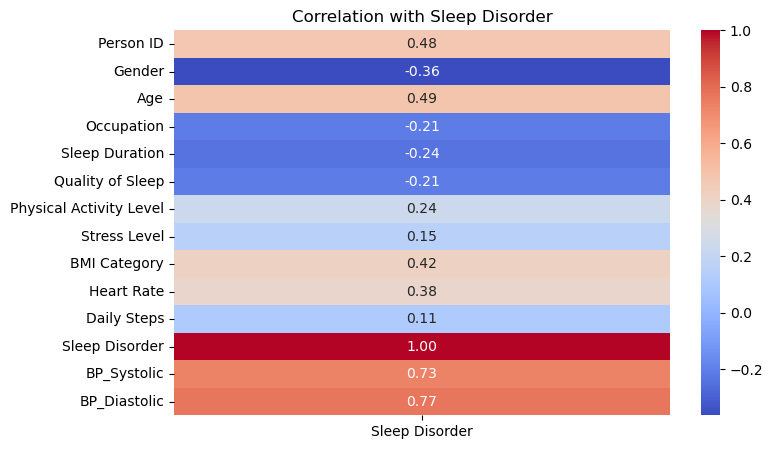

In [14]:
SD_corr = df_new.corr()[['Sleep Disorder']]
plt.figure(figsize=(8,5))
sns.heatmap(SD_corr,cmap='coolwarm',annot=True,fmt=".2f")

plt.title('Correlation with Sleep Disorder')
plt.show()

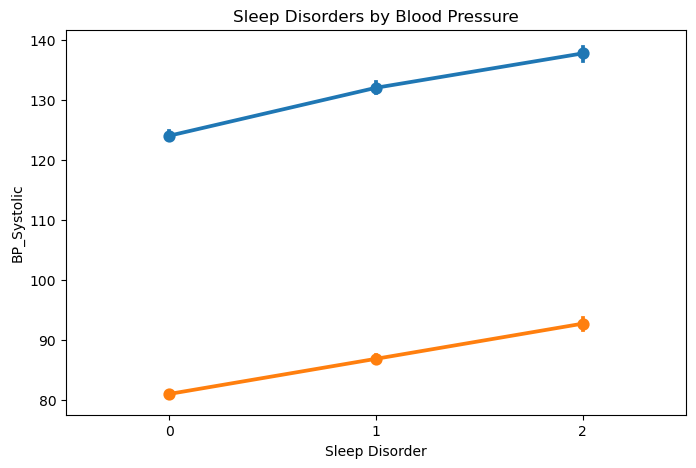

In [15]:
plt.figure(figsize=(8,5))
sns.pointplot(data=df_new, y='BP_Systolic', x='Sleep Disorder')
sns.pointplot(data=df_new, y='BP_Diastolic', x='Sleep Disorder')
plt.title('Sleep Disorders by Blood Pressure')
plt.show()

 Answer: Correlation matrix and point plot shows us that main factor that causes Sleep Disorders is a Blood Pressure.

##### Question 2. Does an increased physical activity level result in a better quality of sleep?

In [16]:
df_new.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP_Systolic,BP_Diastolic
0,1,1,27,8,6.1,6,42,6,1,77,4200,0,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
3,4,1,28,10,5.9,4,30,8,2,85,3000,2,140,90
4,5,1,28,10,5.9,4,30,8,2,85,3000,2,140,90


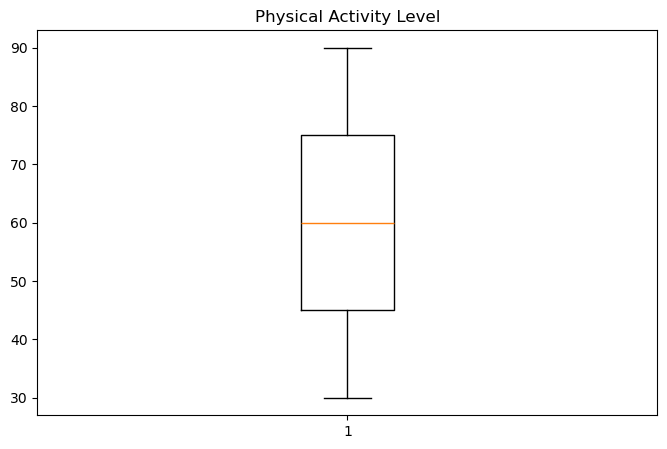

In [17]:
plt.figure(figsize=(8,5))

plt.boxplot(df_new['Physical Activity Level'])

plt.title('Physical Activity Level')

plt.show()

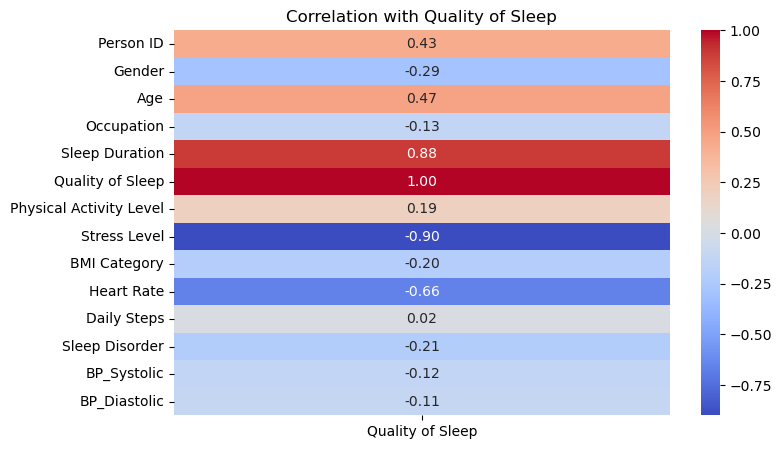

In [18]:
SD_corr = df_new.corr()[['Quality of Sleep']]
plt.figure(figsize=(8,5))
sns.heatmap(SD_corr,cmap='coolwarm',annot=True,fmt=".2f")

plt.title('Correlation with Quality of Sleep')
plt.show()

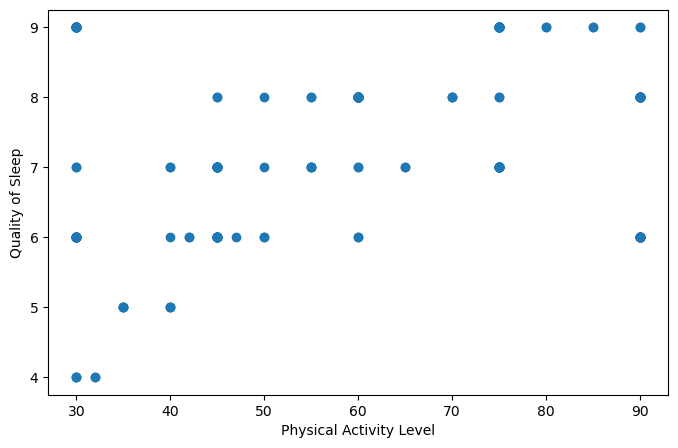

In [19]:
plt.figure(figsize=(8,5))

plt.scatter(df_new['Physical Activity Level'],df_new['Quality of Sleep'])

plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')  
plt.title('')

plt.show()

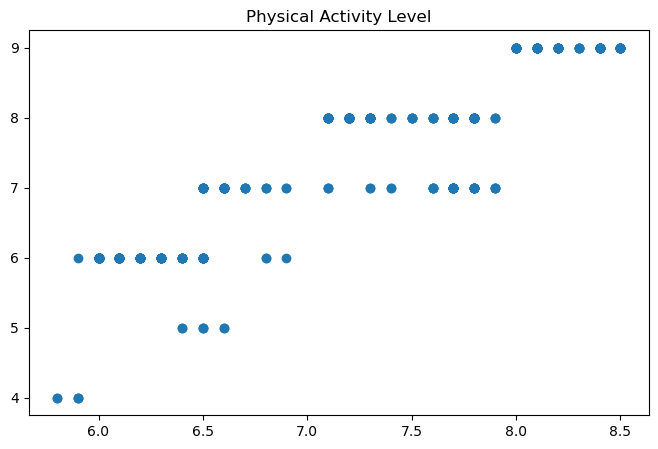

In [20]:
plt.figure(figsize=(8,5))

plt.scatter(df_new['Sleep Duration'],df_new['Quality of Sleep'])

plt.xlabel('')  
plt.title('Physical Activity Level')

plt.show()

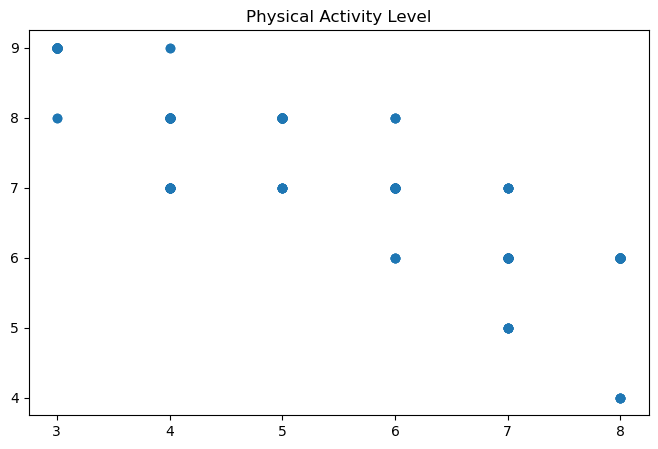

In [21]:
plt.figure(figsize=(8,5))

plt.scatter(df_new['Stress Level'],df_new['Quality of Sleep'])

plt.xlabel('')  
plt.title('Physical Activity Level')

plt.show()

Answer: An Increased Physical Activity does not affect much on Quality of Sleep as Sleep Duration and Stress Level

##### Question 3. Does the presence of a sleep disorder affect the subjective sleep quality metric?

C:\Users\shunp\AppData\Local\Temp\ipykernel_6108\3654143872.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels)


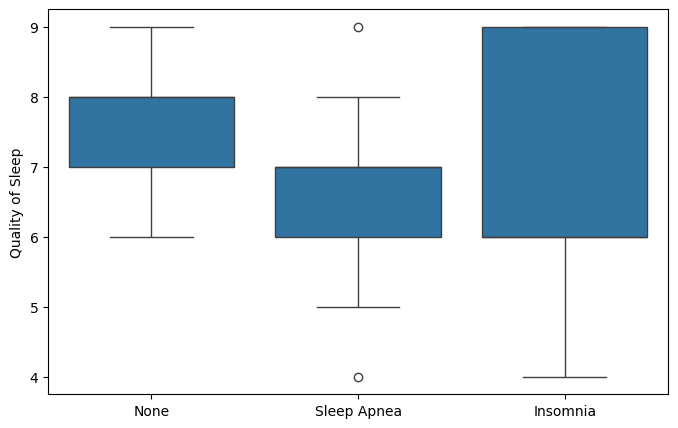

In [22]:
plt.figure(figsize=(8,5))

labels = ['None','Sleep Apnea', 'Insomnia']

plot = sns.boxplot(data=df_new, x='Sleep Disorder', y='Quality of Sleep')

plot.set_xticklabels(labels)

plt.xlabel('')  
plt.title('')

plt.show()

Answer: Yes, pressence of a Sleep Disorder affects Quality of sleep badly. People with no disorder have a good quality, people with Sleep Apnea have worse quality, while people with Insomnia spreads for all quality scores.

##### Question 4. What's the difference of sleep quality for each occupation?

In [23]:
df_new.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP_Systolic,BP_Diastolic
0,1,1,27,8,6.1,6,42,6,1,77,4200,0,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
3,4,1,28,10,5.9,4,30,8,2,85,3000,2,140,90
4,5,1,28,10,5.9,4,30,8,2,85,3000,2,140,90


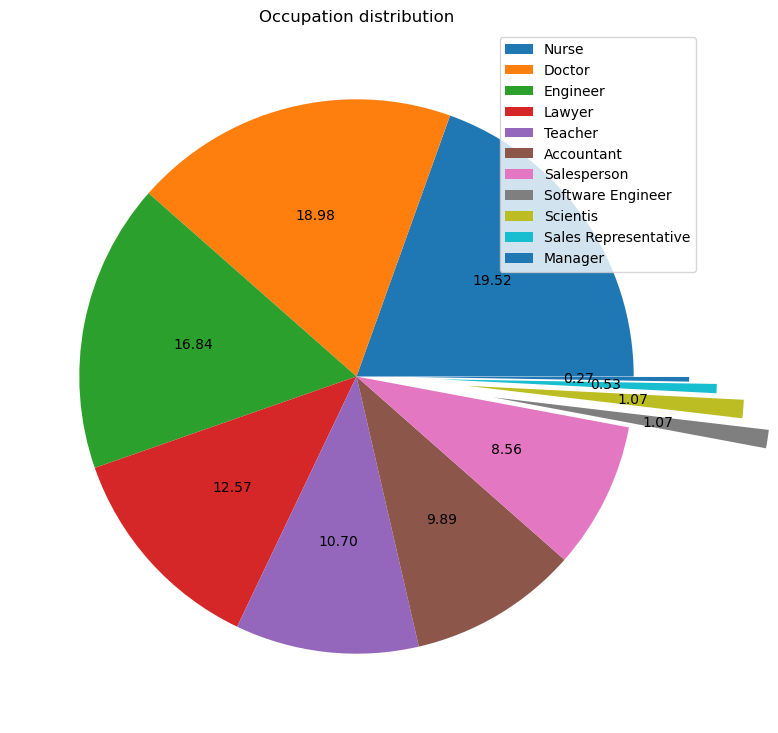

In [71]:
plt.figure(figsize=(15,9))

lab = ['Nurse','Doctor', 'Engineer', 'Lawyer', 'Teacher' ,'Accountant', 'Salesperson', 'Software Engineer', 'Scientis', 'Sales Representative', 'Manager']
expl = [0,0,0,0,0,0,0,0.5,0.4,0.3,0.2]

plt.pie(df['Occupation'].value_counts(), explode=expl, autopct='%.2f')

plt.legend(lab)
plt.title('Occupation distribution')

plt.show()

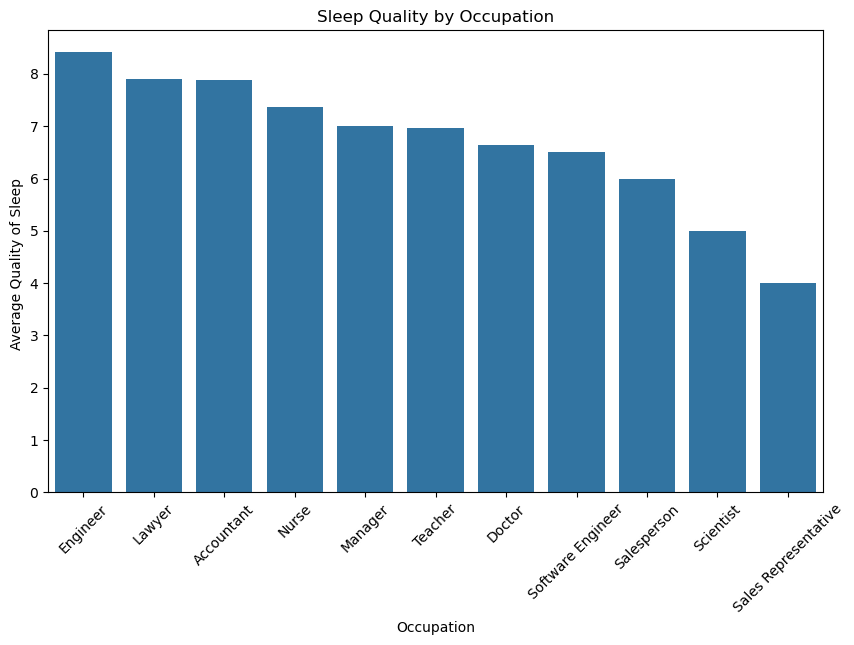

In [73]:
plt.figure(figsize=(10, 6))

order = df.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=False)

sns.barplot(x=order.index, y=order.values)

plt.xticks(rotation=45)  
plt.xlabel('Occupation')
plt.ylabel('Average Quality of Sleep ')
plt.title('Sleep Quality by Occupation')

plt.show()

Answer: I can't say that occupation affects sleep quality. So low level for Sales Representative can be explained by low amount of data for them

##### Question 5. Whats the link between age and sleep duration?

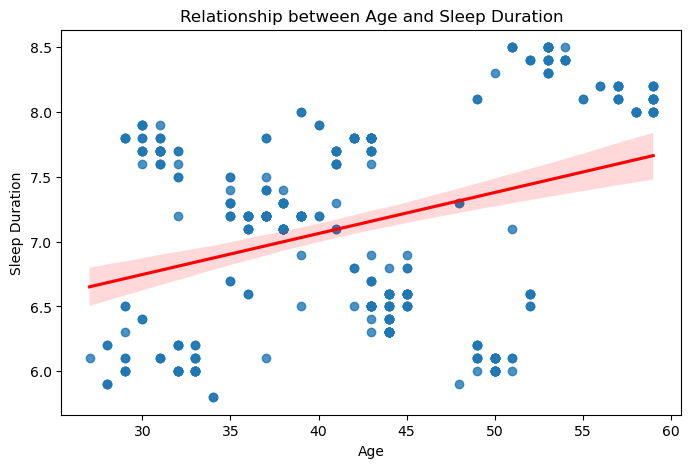

In [96]:
plt.figure(figsize=(8, 5))

sns.regplot(x=df_new['Age'], y=df_new['Sleep Duration'], line_kws={'color': 'red'})

plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Relationship between Age and Sleep Duration')

plt.show()

Answer: Looking in the majority we can see that younger sleeps less, while older people longer. I don't know why actually :( Maybe we have small amount of data?